In [2]:
from utils.LLM import RetrievalWithPrompt, IsGenerationalRequest, GenerateDescriptions, GenerateStyle, StyleCommandDistinguisher, UltimateRefiner

ImportError: cannot import name 'ultimate_refiner' from 'utils.LLM' (/Users/vincent/Projects/專四下/進階AI課程/Prompt_Tuning_Stable_Diffusion/utils/LLM.py)

In [ ]:
# mode: 1=>remote sever 2=>local server
retriever = RetrievalWithPrompt(mode=2) 

/Users/vincent/Projects/專四下/進階AI課程/Prompt_Tuning_Stable_Diffusion/venv/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
retriever.invoke("a cat")

[Document(page_content='a mix between a cat and a dog', metadata={'url': 'https://image.lexica.art/full_jpg/05058511-9713-4fa3-a56a-9d7e50fda8f1', 'source_site': 'lexica.art'}),
 Document(page_content='a mix of dog and cat', metadata={'url': 'https://image.lexica.art/full_jpg/2d7cb7ce-69fd-4da7-a3d8-79fc3821ed9f', 'source_site': 'lexica.art'}),
 Document(page_content='Cat with human feet', metadata={'url': 'https://image.lexica.art/full_jpg/007078fb-1faa-4749-807a-ea385acf50cb', 'source_site': 'lexica.art'}),
 Document(page_content='A cat wird red Skin', metadata={'url': 'https://image.lexica.art/full_jpg/27669c62-a5e5-47c2-808c-76f1871b4047', 'source_site': 'lexica.art'}),
 Document(page_content='fluffy white cat', metadata={'url': 'https://image.lexica.art/full_jpg/33b2ccfa-fc76-45ea-aa96-c4ab30bc8dee', 'source_site': 'lexica.art'})]

In [ ]:
judge = IsGenerationalRequest()
judge.invoke("a cat run on the street")

{'result': 'no'}

In [ ]:
description_advisor = GenerateDescriptions()
ans1 = description_advisor.invoke("a cat is running on the street")["result"]
ans2 = description_advisor.invoke("A lion sitting on the chair")["result"]
ans3 = description_advisor.invoke("an aisin woman cooking")["result"]

print(len(ans1))
print(len(ans2))
print(len(ans3))


print(ans1)
print(ans2)
print(ans3)

3
3
3
['Midnight fur flying, whiskers twitching, a sleek black cat dashes across the rain-soaked pavement, neon streetlights casting an otherworldly glow.', "A whirlwind of orange and white fur, the cat's paws barely touching the ground as it weaves through puddles and discarded trash cans on the bustling city street.", 'In the midst of a drizzly evening, a tiny ball of fluff with piercing green eyes streaks down the sidewalk, its tail streaming behind like a banner as it chases an elusive firefly.']
["Majestic lion sprawled across velvet cushions, its tawny mane a fiery halo against the opulent room's rich tones.", 'In a whimsical twist, a regal lion perches atop a plush throne, its golden fur glistening like polished brass in the warm light of sunset.', 'A surreal scene unfolds as a majestic lion reclines on a vintage armchair, its whiskers twitching with gentle curiosity as it surveys its kingdom.']
['A petite Asian woman kneads dough in a worn wooden bowl, surrounded by wisps of st

In [ ]:
# error_counter = 0
# empty_counter = 0

# for i in range(100):
#     try:
#         ans = description_advisor.invoke("a cat is running on the street")
#         # print(ans)
#         if ans == {}:
#             empty_counter += 1
#     except:
#         error_counter += 1

# print(f"empty_counter: {empty_counter}")
# print(f"error_counter: {error_counter}")

In [ ]:
style_advisor = GenerateStyle()
print(style_advisor.invoke("a cat is running on the street"))

{'result': ['Realistic', 'Cartoonish', 'Impressionist', 'Minimalist', 'Surreal', 'Stylized']}


In [ ]:
style_command_distinguisher = StyleCommandDistinguisher()
print(style_command_distinguisher.invoke("I want a preview of the style of Watercolor"))
print(style_command_distinguisher.invoke("I want to try out the style of anime"))
print(style_command_distinguisher.invoke("I want to see the final result"))
print(style_command_distinguisher.invoke("add the style of oil painting"))
print(style_command_distinguisher.invoke("anime"))
print(style_command_distinguisher.invoke("that's it"))
print(style_command_distinguisher.invoke("how it will look like in anime style"))


{'mode': 'preview', 'style': 'Watercolor'}
{'mode': 'add', 'style': 'anime'}
{'mode': 'final', 'style': ''}
{'mode': 'add', 'style': 'oil painting'}
{'mode': 'add', 'style': 'anime'}
{'mode': 'final', 'style': ''}
{'mode': 'add', 'style': 'anime'}


The desert landscape unfurls like a canvas as riders hurtle by, their bikes a blur of chrome and leather against the rust-hued terrain.
Renders a high-octane motorcycle race in the desert landscape with rust-hued terrain, blurred bikes, and speeding riders, blending vibrant colors and gritty realism.
Model: sd_xl_base_1.0.safetensors [31e35c80fc]
{'prompt': 'Renders a high-octane motorcycle race in the desert landscape with rust-hued terrain, blurred bikes, and speeding riders, blending vibrant colors and gritty realism. <lora:lcm_lora_sdxl:1>', 'negative_prompt': 'deform, ugly', 'styles': [], 'sampler_name': 'LCM', 'batch_size': 1, 'steps': 6, 'cfg_scale': 1, 'width': 1024, 'height': 1024, 'sampler_index': 'LCM'}
Time: 33.21s


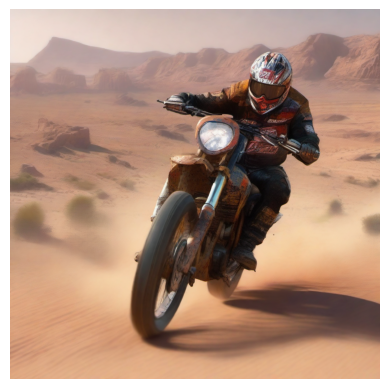

Model: sd_xl_base_1.0.safetensors [31e35c80fc]
{'prompt': ', a motorcycle race in the desert <lora:lcm_lora_sdxl:1>', 'negative_prompt': 'deform, ugly', 'styles': [], 'sampler_name': 'LCM', 'batch_size': 1, 'steps': 6, 'cfg_scale': 1, 'width': 1024, 'height': 1024, 'sampler_index': 'LCM'}
Time: 15.27s


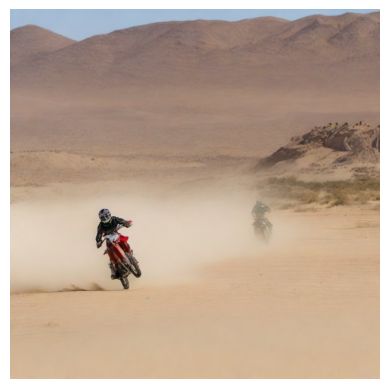

(<PIL.PngImagePlugin.PngImageFile image mode=RGB size=1024x1024>,
 15.274105072021484)

In [21]:
from utils.LLM import RetrievalWithPrompt, IsGenerationalRequest, GenerateDescriptions, GenerateStyle, StyleCommandDistinguisher, UltimateRefiner
from util_txt2img import txt2img
ultimate_refiner = UltimateRefiner()
base_prompt = "a motorcycle race in the desert"
style=""
GenerateDescriptions = GenerateDescriptions()
description = GenerateDescriptions.invoke(base_prompt)["result"][2]
print(description)
final_prompt = ultimate_refiner.invoke(base_prompt=base_prompt, style=style, description=description)["result"]
print(final_prompt)
txt2img(final_prompt, to_show=True)
txt2img(f"{style}, {base_prompt}", to_show=True)



nice prompt:
base_prompt = "stone shapped hotel units on the beach"
style="Impressionism"

